In [73]:
pip install scikeras

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [3]:
#import the dataset
drive.mount('/content/drive')
#allow all the rows to be printed-if you want only the first(50)data.head
data = pd.read_csv('/content/drive/MyDrive/cancer patient data sets.csv')
#print(data.head(2))
#target class distribution
print(data['Level'].value_counts())
# Show dataset summary statistics
from IPython.display import display
display(data.describe())



Mounted at /content/drive
Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


Age                         False
Gender                      False
Air Pollution               False
Alcohol use                 False
Dust Allergy                False
OccuPational Hazards        False
Genetic Risk                False
chronic Lung Disease        False
Balanced Diet               False
Obesity                     False
Smoking                     False
Passive Smoker              False
Chest Pain                  False
Coughing of Blood           False
Fatigue                     False
Weight Loss                 False
Shortness of Breath         False
Wheezing                    False
Swallowing Difficulty       False
Clubbing of Finger Nails    False
Frequent Cold               False
Dry Cough                   False
Snoring                     False
Level                       False
dtype: bool


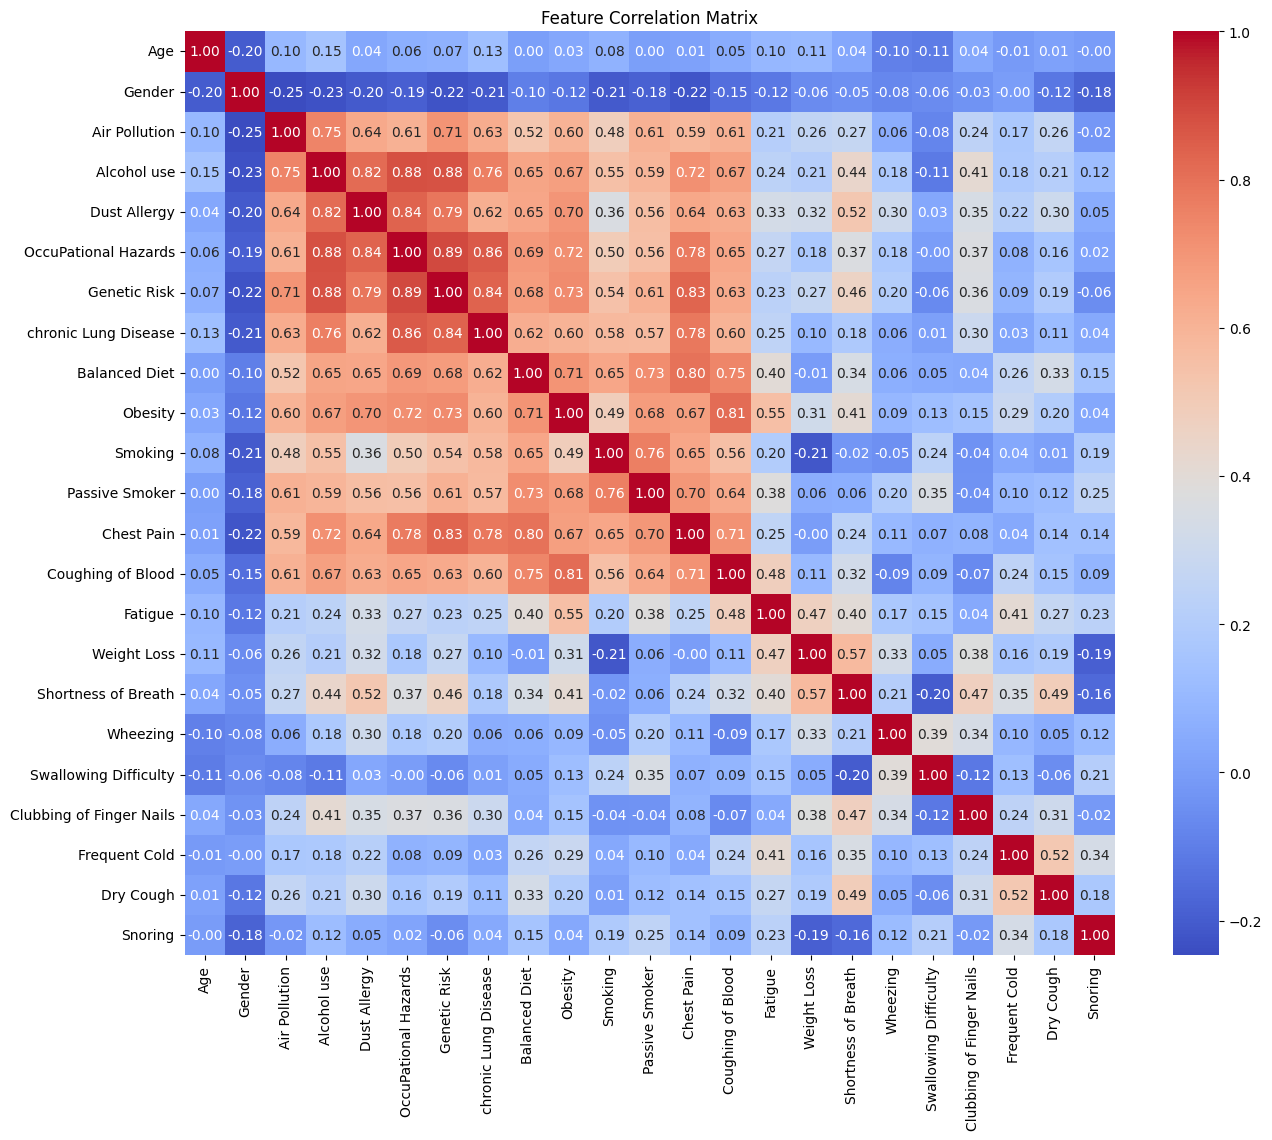

Correlation of Features with Target:
Target                      1.000000
Obesity                     0.827435
Coughing of Blood           0.782092
Alcohol use                 0.718710
Dust Allergy                0.713839
Balanced Diet               0.706273
Passive Smoker              0.703594
Genetic Risk                0.701303
OccuPational Hazards        0.673255
Chest Pain                  0.645461
Air Pollution               0.636038
Fatigue                     0.625114
chronic Lung Disease        0.609971
Smoking                     0.519530
Shortness of Breath         0.497024
Frequent Cold               0.444017
Dry Cough                   0.373968
Weight Loss                 0.352738
Snoring                     0.289366
Clubbing of Finger Nails    0.280063
Swallowing Difficulty       0.249142
Wheezing                    0.242794
Age                         0.060048
Gender                     -0.164985
Name: Target, dtype: float64

Highly Correlated Features (|correlation| > 0

In [4]:
#Preprocessing the dataset for the MLP model
# remove unnecessary columns such as index and Patient Id
data=data.drop(columns=["index","Patient Id"])

#check for null values of every feature
print(data.isnull().any())

# define features and target variable
X = data.drop(columns=["Level"]) #features
y = data["Level"] #target


# encode target variable 0:low 1:medium 2:high
label_encoder = LabelEncoder()
data["Level"] = label_encoder.fit_transform(data["Level"])
data["Level"]= data["Level"].replace({ 0: 2 , 1: 0, 2: 1})


# redefine features and target variable
X = data.drop(columns=["Level"]) #features
y = data["Level"] #target

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


# Detect outliers using Z-score
z_scores = np.abs(zscore(X_scaled))  # Compute Z-scores for each feature
threshold = 3  # Threshold for outliers
outliers = (z_scores > threshold)

# Count outliers/feature
outlier_summary = pd.DataFrame({
    'Feature': X.columns,
    'Outlier Count': np.sum(outliers, axis=0)
}).sort_values(by='Outlier Count', ascending=False)



#Compute the correlation matrix for the scaled features
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()

# Analyze correlation with the target variable
# Append the target to the scaled features for this analysis
df_with_target = pd.DataFrame(X_scaled, columns=X.columns)
df_with_target['Target'] = y

# Compute correlation of each feature with the target
correlation_with_target = df_with_target.corr()['Target'].sort_values(ascending=False)
print("Correlation of Features with Target:")
print(correlation_with_target)

# Identify highly correlated features
threshold = 0.9  # Define a threshold for high correlation
high_correlation_pairs = [
    (feature1, feature2, correlation_matrix.loc[feature1, feature2])
    for feature1 in correlation_matrix.columns
    for feature2 in correlation_matrix.columns
    if feature1 != feature2 and abs(correlation_matrix.loc[feature1, feature2]) > threshold
]
print("\nHighly Correlated Features (|correlation| > 0.9):")
print(high_correlation_pairs)

In [5]:
#Split the dataset 60% training set and 40% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
# the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 600 samples
Test set size: 400 samples


In [6]:
# Convert class labels to a numpy array
#class weights are calculated based on the distribution of the training data as it’s the data the model will learn from
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
#classes = np.array([0, 1, 2])
#class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
#class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print(class_weights_dict)

{0: 1.098901098901099, 1: 1.0050251256281406, 2: 0.91324200913242}


In [7]:
#implementation of knn classifier with neighbor=1, neighbor=3 and nearest centroid classifier
# implementation of knn classifier with 1 neighbor k=1
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)

# make predictions on the test set
y_pred1 = knn_1.predict(X_test)

# evaluate the model knn=1 performance
accuracy1 = accuracy_score(y_test, y_pred1)

# implementation of knn classifier with 3 neighbors k=3
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)

# make predictions on the test set
y_pred2 = knn_1.predict(X_test)

# evaluate the model knn=3 performance
accuracy2 = accuracy_score(y_test, y_pred2)

# implementation of centroid classifier
centroid_classifier = NearestCentroid()
centroid_classifier.fit(X_train, y_train.values.ravel())

# make predictions on the test set
y_pred_centroid = centroid_classifier.predict(X_test)

# evaluate the model centroid classifier performance
accuracy_centroid = accuracy_score(y_test, y_pred_centroid)

# print accuracy score % for each model
print(f"Accuracy of 1-Nearest Neighbor Classifier: {accuracy1 * 100:.2f}%")
print(f"Accuracy of 3-Nearest Neighbor Classifier: {accuracy2 * 100:.2f}%")
print(f"Accuracy of Nearest Centroid Classifier: {accuracy_centroid * 100:.2f}%")

Accuracy of 1-Nearest Neighbor Classifier: 99.50%
Accuracy of 3-Nearest Neighbor Classifier: 99.50%
Accuracy of Nearest Centroid Classifier: 73.50%


In [8]:
#BASELINE MODEL-logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))
# Train the baseline logistic regression model
baseline_model = LogisticRegression(class_weight=class_weights_dict)
baseline_model.fit(X_train, y_train)

# Evaluate on the test set
baseline_accuracy = accuracy_score(y_test, baseline_model.predict(X_test))
print(f"Baseline Accuracy: {baseline_accuracy}")

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       121
           1       0.94      0.98      0.96       133
           2       1.00      1.00      1.00       146

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Baseline Accuracy: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [38]:
# Experiment 1:  Neural Network with one hidden layer
y_train = np.array(y_train)
# Encode y_train and y_test if needed
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
shallow_model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1]),
    Dense(3, activation='softmax')
])
shallow_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_shallow = shallow_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16 , class_weight=class_weights_dict, )
# Evaluate on the test set
shallow_accuracy = shallow_model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Shallow NN Accuracy: {shallow_accuracy}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4838 - loss: 1.3662 - val_accuracy: 0.5833 - val_loss: 0.7487
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7245 - loss: 0.5981 - val_accuracy: 0.6833 - val_loss: 0.6054
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8078 - loss: 0.5305 - val_accuracy: 0.8667 - val_loss: 0.4504
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8578 - loss: 0.4069 - val_accuracy: 0.8750 - val_loss: 0.4171
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8906 - loss: 0.3688 - val_accuracy: 0.8167 - val_loss: 0.4655
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9164 - loss: 0.3458 - val_accuracy: 0.9167 - val_loss: 0.3059
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9080 - loss: 0.3052 - val_accuracy: 0.8917 - val_loss: 0.3097
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9229 - loss: 0.2523 - val_accuracy: 0.9500 - val_loss: 0.2

In [37]:
# Experiment 2: Deeper Neural Network with 2 hidden layers
deep_model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])
deep_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model with class weights
history_deep = deep_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weights_dict

)
# Evaluate the deep model on the test set
deep_accuracy = deep_model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Deeper NN Accuracy: {deep_accuracy}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3512 - loss: 3.5347 - val_accuracy: 0.4750 - val_loss: 1.0577
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3819 - loss: 2.3767 - val_accuracy: 0.5250 - val_loss: 1.0482
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4079 - loss: 1.8599 - val_accuracy: 0.6083 - val_loss: 0.8786
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5188 - loss: 1.2627 - val_accuracy: 0.5917 - val_loss: 0.8503
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4636 - loss: 1.1962 - val_accuracy: 0.6167 - val_loss: 0.8210
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5334 - loss: 1.0222 - val_accuracy: 0.6167 - val_loss: 0.7906
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4621 - loss: 1.0842 - val_accuracy: 0.6833 - val_loss: 0.7757
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6174 - loss: 0.8868 - val_accuracy: 0.6250 - val_loss: 0.

In [39]:
print("Shape of X_test:", X_test.shape)  # Expected: (num_samples, num_features)
print("Shape of y_test:", y_test.shape)  # Expected: (num_samples,)
print("Shape of X_train:", X_train.shape)  # Expected: (num_samples, num_features)
print("Shape of y_train:", y_train.shape)  # Expected: (num_samples,)

Shape of X_test: (400, 23)
Shape of y_test: (400,)
Shape of X_train: (600, 23)
Shape of y_train: (600,)


In [43]:
#  model function
def build_model(optimizer='adam'):
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# model for grid search
model = KerasClassifier(model=build_model, verbose=0)

# Define the hyperparameters for tuning
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'model__optimizer': ['adam', 'sgd']
}

#  Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_result.best_params_)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best Parameters: {'batch_size': 16, 'epochs': 100, 'model__optimizer': 'adam'}


In [44]:
# Extract results from grid search
results = pd.DataFrame(grid.cv_results_)

# Select relevant columns
summary_table = results[[
    'param_batch_size', 'param_epochs', 'param_model__optimizer' ,'mean_test_score'
]]

# Rename columns
summary_table.columns = ['Batch Size', 'Epochs', 'Optimizer', 'Validation Accuracy']

# Sort by validation accuracy
summary_table = summary_table.sort_values('Validation Accuracy', ascending=False)

summary_table.reset_index(drop=True, inplace=True)

# Display the table using pandas
print(summary_table)

# If you are in a Jupyter or Colab environment, you can use this for a cleaner display:
#from IPython.display import display
#display(summary_table)

    Batch Size  Epochs Optimizer  Validation Accuracy
0           16     100      adam             0.998333
1           32     100      adam             0.988333
2           16     100       sgd             0.981667
3           16      50      adam             0.980000
4           32     100       sgd             0.968333
5           64     100      adam             0.966667
6           16      50       sgd             0.955000
7           32      50      adam             0.923333
8           32      50       sgd             0.923333
9           64     100       sgd             0.915000
10          64      50       sgd             0.881667
11          64      50      adam             0.873333


In [47]:
#train final model
# Train the final model with best parameters
final_model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compile with the best optimizer
final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
final_history = final_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=0)
print(f"Final Model Test Loss: {test_loss}")
print(f"Final Model Test Accuracy: {test_accuracy}")

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3320 - loss: 3.5877
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5242 - loss: 1.5055
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - loss: 0.8890
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6688 - loss: 0.7743
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7276 - loss: 0.6717
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7474 - loss: 0.6410
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8015 - loss: 0.5347
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7818 - loss: 0.5210
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8029 - loss: 0.4906
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8220 - loss: 0.4186
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 0.3803
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8858 - lo

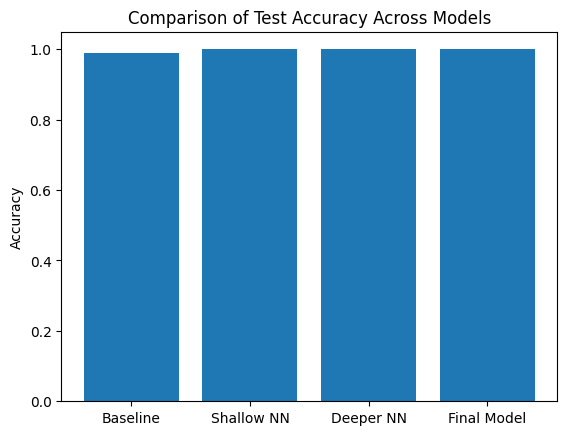

In [48]:
# Compare test accuracy across models
results = {
    "Baseline": baseline_accuracy,
    "Shallow NN": shallow_accuracy,
    "Deeper NN": deep_accuracy,
    "Final Model": test_accuracy
}
plt.bar(results.keys(), results.values())
plt.title("Comparison of Test Accuracy Across Models")
plt.ylabel("Accuracy")
plt.show()

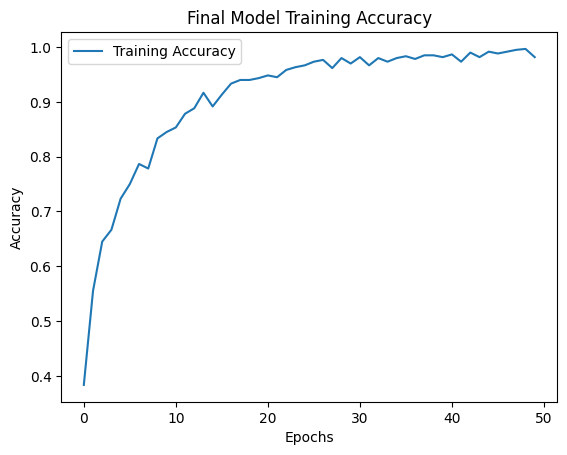

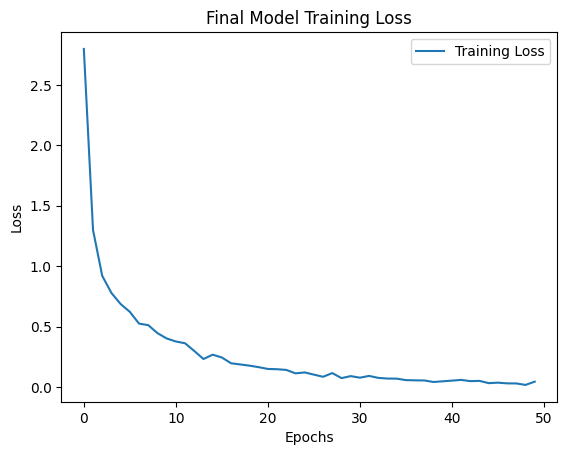

In [56]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(final_history.history['accuracy'], label='Training Accuracy')
plt.title('Final Model Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training loss
plt.plot(final_history.history['loss'], label='Training Loss')
plt.title('Final Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
24/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0045     Epoch 1: Test Loss = 0.0002, Test Accuracy = 1.0000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0044 - test_loss: 2.3773e-04 - test_accuracy: 1.0000
Epoch 2/50
36/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0052Epoch 2: Test Loss = 0.0011, Test Accuracy = 1.0000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9992 - loss: 0.0054 - test_loss: 0.0011 - test_accuracy: 1.0000
Epoch 3/50
36/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9931 - loss: 0.0129Epoch 3: Test Loss = 0.0005, Test Accuracy = 1.0000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9931 - loss: 0.0132 - test_loss: 5.4386e-04 - test_accuracy: 1.0000
Epoch 4/50
19/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0052     Epoch 4: Test Loss = 0.0003, Test Accuracy = 1.0000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9989 - loss: 0.0077 - test_loss: 3.019

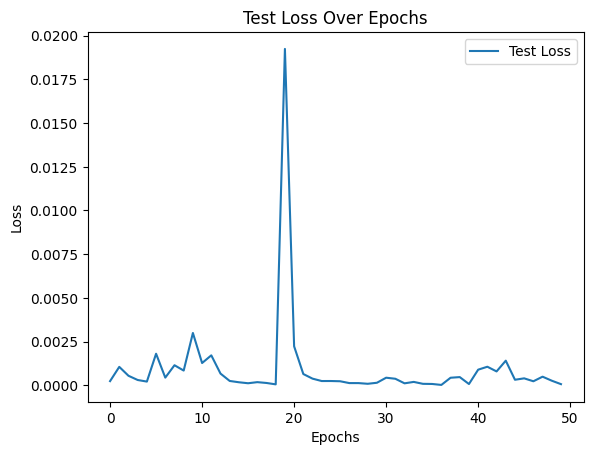

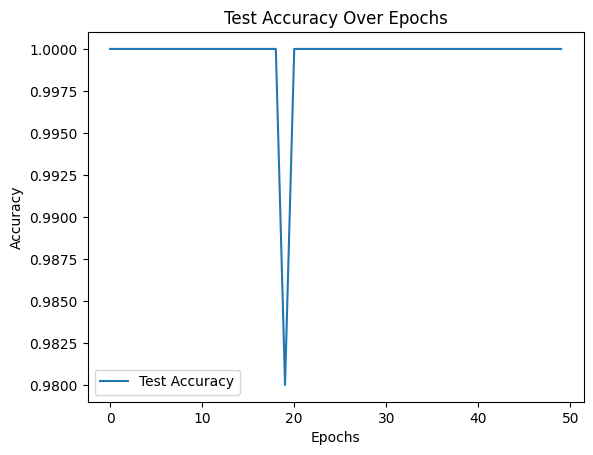

In [59]:
from tensorflow.keras.callbacks import Callback

class TestMetricsCallback(Callback):
    def __init__(self, test_data):
        super().__init__()
        self.test_data = test_data
        self.test_loss = []
        self.test_accuracy = []

    def on_epoch_end(self, epoch, logs=None):
        # Use the model automatically assigned to self.model
        loss, accuracy = self.model.evaluate(self.test_data[0], self.test_data[1], verbose=0)
        self.test_loss.append(loss)
        self.test_accuracy.append(accuracy)
        # Append test metrics to the logs
        logs['test_loss'] = loss
        logs['test_accuracy'] = accuracy
        print(f"Epoch {epoch + 1}: Test Loss = {loss:.4f}, Test Accuracy = {accuracy:.4f}")

# Add the callback to your training process
test_metrics_callback = TestMetricsCallback((X_test, y_test))

final_history = final_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    verbose=1,
    callbacks=[test_metrics_callback]
)
import matplotlib.pyplot as plt

# Plot Test Loss
plt.plot(test_metrics_callback.test_loss, label='Test Loss')
plt.title('Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Test Accuracy
plt.plot(test_metrics_callback.test_accuracy, label='Test Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [72]:
#Correct and incorrect classification examples
if len(correct_indices) > 0:
    correct_samples = pd.DataFrame({
        "Features": [X_test.iloc[i].values.tolist() for i in correct_indices[:5]],  # Use .values to extract as array
        "True Label": [y_test[i] for i in correct_indices[:5]],
        "Predicted Label": [y_pred[i] for i in correct_indices[:5]]
    })
    print("Correctly Classified Examples:")
    print(correct_samples)
else:
    print("No correctly classified samples found.")

if len(incorrect_indices) > 0:
    incorrect_samples = pd.DataFrame({
        "Features": [X_test.iloc[i].values.tolist() for i in incorrect_indices[:5]],  # Use .values to extract as array
        "True Label": [y_test[i] for i in incorrect_indices[:5]],
        "Predicted Label": [y_pred[i] for i in incorrect_indices[:5]]
    })
    print("Incorrectly Classified Examples:")
    print(incorrect_samples)
else:
    print("No incorrectly classified samples found.")

Correctly Classified Examples:
                                            Features  True Label  \
0  [31, 2, 3, 2, 4, 2, 3, 2, 3, 3, 2, 2, 3, 3, 4,...           1   
1  [44, 1, 6, 7, 7, 7, 7, 6, 7, 7, 7, 8, 7, 7, 5,...           2   
2  [32, 2, 1, 6, 7, 5, 3, 2, 6, 2, 3, 3, 2, 2, 3,...           1   
3  [32, 1, 2, 3, 6, 7, 7, 7, 7, 2, 4, 3, 7, 4, 2,...           0   
4  [44, 1, 2, 1, 5, 3, 2, 3, 2, 4, 1, 4, 2, 4, 6,...           1   

   Predicted Label  
0                1  
1                2  
2                1  
3                0  
4                1  
Incorrectly Classified Examples:
                                            Features  True Label  \
0  [38, 1, 2, 3, 5, 2, 1, 1, 1, 1, 4, 3, 2, 4, 2,...           0   
1  [38, 1, 2, 3, 5, 2, 1, 1, 1, 1, 4, 3, 2, 4, 2,...           0   
2  [38, 1, 2, 3, 5, 2, 1, 1, 1, 1, 4, 3, 2, 4, 2,...           0   
3  [38, 1, 2, 3, 5, 2, 1, 1, 1, 1, 4, 3, 2, 4, 2,...           0   
4  [39, 2, 4, 5, 6, 6, 5, 4, 6, 6, 6, 6, 6, 6, 5,...         